### Intervalo de Confiança

In [2]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

In [3]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [7]:
n = len(dados)
n

100

In [5]:
media = np.mean(dados)
media

159.25

In [6]:
desvio_padrao = np.std(dados)
desvio_padrao

13.65

In [9]:
alpha = 0.05 / 2
alpha

0.025

In [10]:
1 - alpha

0.975

In [11]:
z = norm.ppf(1 - alpha)
z

1.959963984540054

In [12]:
xi = media - z * (desvio_padrao / math.sqrt(n))
xi

156.57464916110283

In [14]:
xs = media + z * (desvio_padrao / math.sqrt(n))
xs

161.92535083889717

In [15]:
margem_error = abs(media - xs)
margem_error

2.675350838897174

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

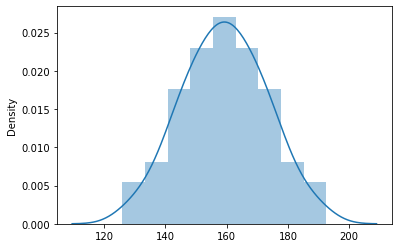

In [17]:
sns.distplot(dados)

In [18]:
stats.sem(dados)

1.3718766178288244

In [19]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(156.5611712378229, 161.9388287621771)

### Distribuição T-Student

In [20]:
dados = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [21]:
n = len(dados)
n

9

In [22]:
media = dados.mean()
media

161.77777777777777

In [23]:
desvio_padrao = np.std(dados)
desvio_padrao

12.786953227391823

In [24]:
from scipy.stats import t

In [25]:
intervalos = t.interval(0.95, n - 1, media, stats.sem(dados, ddof = 0))
intervalos

(151.9488554388298, 171.60670011672573)

In [27]:
margem_error = media - intervalos[0]
margem_error

9.828922338947962

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('..\Bases de dados\credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [32]:
X = dataset.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [33]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  
  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv = kfold)
  resultados_naive_bayes_cv_300.append(scores)
  resultados_naive_bayes_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv_300.append(scores)
  resultados_logistica_cv.append(scores.mean())
  
  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest_cv_300.append(scores)
  resultados_forest_cv.append(scores.mean())

In [35]:
len(resultados_naive_bayes_cv), len(resultados_naive_bayes_cv_300)

(30, 30)

In [36]:
print(resultados_naive_bayes_cv)

[0.9248618090452261, 0.9249170854271356, 0.9248894472361808, 0.9228819095477387, 0.9248718592964824, 0.9253894472361809, 0.9243844221105528, 0.9248894472361808, 0.9248718592964824, 0.9238894472361808, 0.9253844221105527, 0.9244020100502512, 0.9253743718592965, 0.924394472361809, 0.9253869346733667, 0.9248819095477387, 0.9258844221105527, 0.924894472361809, 0.9238819095477387, 0.9258844221105529, 0.9258944723618091, 0.9253894472361811, 0.92436432160804, 0.9263844221105527, 0.9228944723618092, 0.9253894472361809, 0.9248869346733668, 0.9253919597989949, 0.9253819095477386, 0.9258844221105527]


In [37]:
print(resultados_naive_bayes_cv_300)

[array([0.91      , 0.93      , 0.96      , 0.925     , 0.94      ,
       0.895     , 0.965     , 0.89949749, 0.87939698, 0.94472362]), array([0.92      , 0.945     , 0.895     , 0.92      , 0.915     ,
       0.93      , 0.89      , 0.94974874, 0.93467337, 0.94974874]), array([0.93      , 0.89      , 0.94      , 0.935     , 0.905     ,
       0.935     , 0.935     , 0.91959799, 0.94472362, 0.91457286]), array([0.91      , 0.945     , 0.95      , 0.94      , 0.92      ,
       0.9       , 0.9       , 0.90954774, 0.91959799, 0.93467337]), array([0.96      , 0.93      , 0.94      , 0.905     , 0.935     ,
       0.93      , 0.905     , 0.90452261, 0.89949749, 0.93969849]), array([0.915     , 0.91      , 0.945     , 0.945     , 0.9       ,
       0.935     , 0.925     , 0.96482412, 0.89949749, 0.91457286]), array([0.955     , 0.935     , 0.915     , 0.94      , 0.905     ,
       0.9       , 0.925     , 0.92462312, 0.92462312, 0.91959799]), array([0.94      , 0.92      , 0.925     , 0.91

In [38]:
np.asarray(resultados_naive_bayes_cv_300).shape

(30, 10)

In [39]:
# transformam para uma única dimensão

resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

In [40]:
resultados_naive_bayes_cv_300.shape

(300,)

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


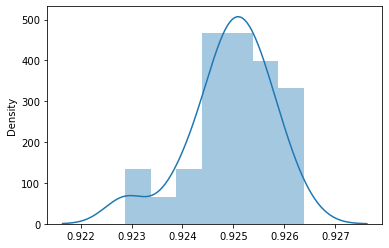

In [41]:
sns.distplot(resultados_naive_bayes_cv);

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


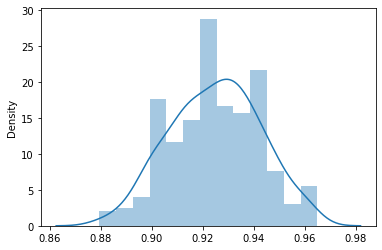

In [42]:
# mais parecido com uma distruição normal

sns.distplot(resultados_naive_bayes_cv_300);

### Teste de Hipótese